# Road Map for this project
## 1. Data Cleaning
## 2. Model Experiments
## 3. Parameter Selection

## 1. Data Cleaning

### 1.1 Package import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel("~/Downloads/Reunion Giving Predictive Modeling Data Sample 041714.xlsx")

In [3]:
df.columns

Index([u'CaseNum', u'RYCohort', u'SpouseAlum', u'State', u'Gave2009',
       u'Gave2004', u'Gave1999', u'BetweenRY', u'ActionNote', u'SportsAlum',
       u'UGAlumAwards', u'OtherUGAct', u'WealthEngine Rating', u'EverAssigned',
       u'BoardMember', u'ChildAlum', u'ParentAlum', u'SiblingAlum',
       u'GradDegree', u'Attended09', u'Attended04', u'Attended99',
       u'TotalReunions', u'NetEvents', u'OnePlusEvents', u'TotalActions',
       u'Last Gift Date', u'Years Lapsed', u'Never Given'],
      dtype='object')

### 1.2 Inpect the data

In [4]:
df.head()

,CaseNum,RYCohort,SpouseAlum,State,Gave2009,Gave2004,Gave1999,BetweenRY,ActionNote,SportsAlum,UGAlumAwards,OtherUGAct,WealthEngine Rating,EverAssigned,BoardMember,ChildAlum,ParentAlum,SiblingAlum,GradDegree,Attended09,Attended04,Attended99,TotalReunions,NetEvents,OnePlusEvents,TotalActions,Last Gift Date,Years Lapsed,Never Given
0,1,1969,0,,0,0,0,0,0,1,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT,48,1
1,2,1964,0,CA,0,0,0,0,0,0,0,0,"5: $100,000-$249,999",0,0,0,0,0,0,0,0,0,0,0,0,0,1982-06-29,32,0
2,3,1964,0,,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT,48,1
3,4,1964,0,CA,0,0,0,1,1,0,0,0,"2: $1,000,000-$4,999,999",1,0,0,0,0,0,0,1,0,2,1,1,1,2010-06-24,4,0
4,5,1959,0,CA,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,1994-02-16,20,0


### 1.3 Data Cleaning

In [5]:
df = df.drop(['CaseNum', 'State', 'Last Gift Date', 'Years Lapsed', 'BetweenRY', 'Never Given', 'WealthEngine Rating'], axis=1)

In [6]:
df.iloc[11,:2] ## SpouseAlum needs to be cleaned

RYCohort      1969
SpouseAlum     0rr
Name: 11, dtype: object

In [7]:
df.iloc[11, 1] = 0

In [8]:
df['RYCohort'] = 2009 - df['RYCohort']

### 1.4 Visualize the correlation

In [9]:
import seaborn as sns

In [11]:
corr = df.corr()
corr

,RYCohort,Gave2009,Gave2004,Gave1999,ActionNote,SportsAlum,UGAlumAwards,OtherUGAct,EverAssigned,BoardMember,ChildAlum,ParentAlum,SiblingAlum,GradDegree,Attended09,Attended04,Attended99,TotalReunions,NetEvents,OnePlusEvents,TotalActions
RYCohort,1.000000,0.127084,0.166869,0.162691,0.155483,0.046992,-0.054696,-0.030182,0.154654,0.119388,0.235688,-0.092461,-0.085692,0.065608,0.009083,0.045014,0.106772,0.156271,0.140330,0.119889,0.113517
Gave2009,0.127084,1.000000,0.452111,0.403065,0.364299,0.040967,0.047568,0.073545,0.284068,0.283005,0.221844,0.038610,0.089558,0.067231,0.292805,0.250759,0.244495,0.365302,0.380337,0.290123,0.279885
Gave2004,0.166869,0.452111,1.000000,0.480040,0.305100,0.056771,0.034893,0.063554,0.252532,0.251347,0.223481,0.026612,0.066108,0.038204,0.217848,0.232382,0.233199,0.314729,0.341981,0.278144,0.239400
Gave1999,0.162691,0.403065,0.480040,1.000000,0.319341,0.079329,0.038828,0.067228,0.257543,0.254415,0.194133,0.040774,0.080918,0.068791,0.242758,0.213507,0.296418,0.339321,0.327188,0.306786,0.227585
ActionNote,0.155483,0.364299,0.305100,0.319341,1.000000,0.080048,0.029919,0.080969,0.566610,0.468883,0.214590,0.041491,0.085283,0.115349,0.250841,0.227732,0.222222,0.339680,0.459951,0.313369,0.544933
SportsAlum,0.046992,0.040967,0.056771,0.079329,0.080048,1.000000,0.030056,0.011893,0.056323,0.050624,0.025431,0.011625,0.007039,0.022704,0.079946,0.085024,0.072595,0.106684,0.080687,0.097356,0.054696
UGAlumAwards,-0.054696,0.047568,0.034893,0.038828,0.029919,0.030056,1.000000,0.054349,0.011658,0.042052,0.007000,0.225818,0.075055,0.008988,0.041669,0.033989,0.026135,0.030216,0.081665,0.081524,0.026332
OtherUGAct,-0.030182,0.073545,0.063554,0.067228,0.080969,0.011893,0.054349,1.000000,0.038695,0.097964,0.024891,0.039806,0.055840,0.000163,0.126276,0.130348,0.119934,0.144992,0.091068,0.127725,0.057021
EverAssigned,0.154654,0.284068,0.252532,0.257543,0.566610,0.056323,0.011658,0.038695,1.000000,0.333015,0.227388,0.030579,0.069269,0.089030,0.158755,0.161707,0.157455,0.241474,0.420459,0.242401,0.526446
BoardMember,0.119388,0.283005,0.251347,0.254415,0.468883,0.050624,0.042052,0.097964,0.333015,1.000000,0.215417,0.031311,0.070333,0.117707,0.230072,0.239270,0.211685,0.316291,0.516035,0.262942,0.412241


In [12]:
corr = df[['RYCohort', 'SpouseAlum', 'Gave2009', 'Gave2004', 'Gave1999',
       'ActionNote', 'SportsAlum', 'UGAlumAwards', 'OtherUGAct',
       'EverAssigned', 'BoardMember', 'ChildAlum', 'ParentAlum',
       'SiblingAlum', 'GradDegree', 'Attended09', 'Attended04',
       'Attended99', 'TotalReunions', 'NetEvents', 'OnePlusEvents']].corr()

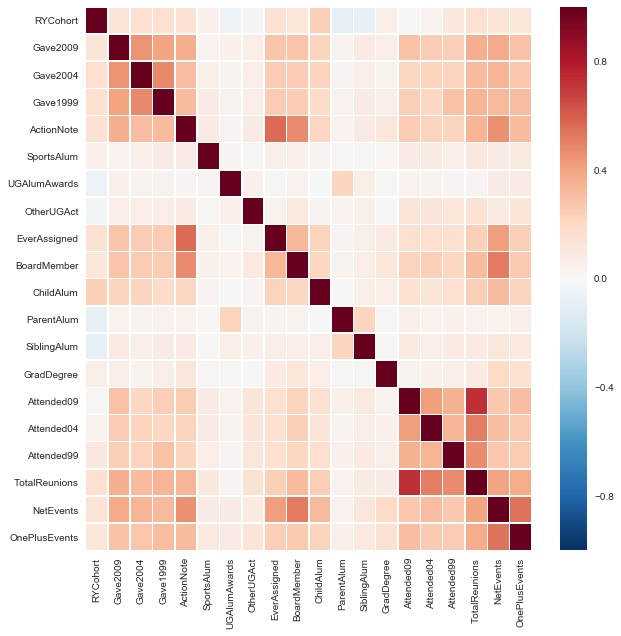

In [13]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, linewidths=.5, ax=ax)

## 2. Model Experiments

### 2.1 Decision Tree

In [14]:
df_with_dummies = df.copy()

In [15]:
import sklearn as sk
import sklearn.tree as tree

In [16]:
X = df_with_dummies.drop(['Gave2009'], axis=1).apply(pd.to_numeric)
y = df_with_dummies['Gave2009']

In [17]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

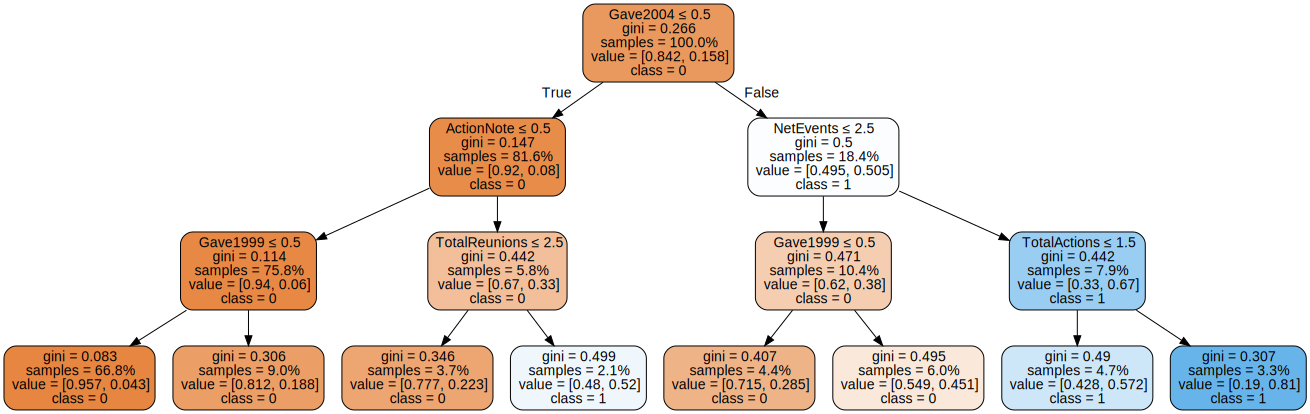

In [18]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = np.array(y.unique(),dtype=np.string_)  ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph 

### 2.2 KMeans

#### 2.2.1  Scale Data

In [19]:
import sklearn.preprocessing as pp
df_scaled = pp.scale(df)

#### 2.2.2 Run KMeans

In [20]:
from sklearn.cluster import KMeans
from multiprocessing.dummy import Pool
import functools

kmeans = KMeans()

# define your custom function for passing into each thread
def find_cluster(n_clusters, kmeans, X):
    from sklearn.metrics import silhouette_score  # you want to import in the scorer in your function

    kmeans.set_params(n_clusters=n_clusters)  # set n_cluster
    labels = kmeans.fit_predict(X)  # fit & predict
    score = silhouette_score(X, labels)  # get the score

    return score

# Now's the parallel implementation
clusters = [2, 3, 4, 5, 6]
pool = Pool()
res = pool.map(functools.partial(find_cluster, kmeans=kmeans, X=df_scaled), clusters)
pool.close()
pool.join()

# print the results
res

[0.28547653028532416,
 0.22608519233220103,
 0.23580617823977768,
 0.23936804066267189,
 0.2289289651283124]

In [21]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2,random_state=0)
clu.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [22]:
clu.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [23]:
df1 = df.copy()

In [24]:
df1['cluster'] = clu.labels_

In [25]:
df1.groupby('cluster').mean()

,RYCohort,Gave2009,Gave2004,Gave1999,ActionNote,SportsAlum,UGAlumAwards,OtherUGAct,EverAssigned,BoardMember,ChildAlum,ParentAlum,SiblingAlum,GradDegree,Attended09,Attended04,Attended99,TotalReunions,NetEvents,OnePlusEvents,TotalActions
cluster,,,,,,,,,,,,,,,,,,,,,
0,31.471127,0.604950,0.607699,0.701192,0.587534,0.156737,0.068744,0.335472,0.356554,0.362053,0.263978,0.109074,0.232814,0.187901,0.617782,0.449129,0.476627,4.755270,6.709441,0.932172,2.742438
1,24.844916,0.076961,0.106983,0.148117,0.033173,0.082932,0.034666,0.185603,0.014264,0.014596,0.029524,0.062697,0.111130,0.075634,0.078122,0.048433,0.063029,0.531597,0.727816,0.314314,0.056394


In [26]:
df1.groupby('cluster').count()

,RYCohort,SpouseAlum,Gave2009,Gave2004,Gave1999,ActionNote,SportsAlum,UGAlumAwards,OtherUGAct,EverAssigned,BoardMember,ChildAlum,ParentAlum,SiblingAlum,GradDegree,Attended09,Attended04,Attended99,TotalReunions,NetEvents,OnePlusEvents,TotalActions
cluster,,,,,,,,,,,,,,,,,,,,,,
0,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
1,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029,6029


### 2.3 Prepare Data for Accuracy Calculation

In [27]:
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

/Users/yuhaowang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
X = X.as_matrix().astype(np.float)
scaler = StandardScaler()
X = scaler.fit_transform(X)
"Feature space holds %d observations and %d features" % X.shape

'Feature space holds 7120 observations and 21 features'

In [29]:
#Write one helper function to calculate the accuracy rate value
def run_cv(X,y,clf_class,**kwargs):
    
    kf = KFold(len(y),n_folds=10,shuffle=True, random_state=2)
    y_pred = y.copy()
    
    
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.metrics import average_precision_score

target = y
def accuracy(y_true,y_pred):
    
    return np.mean(y_true == y_pred)

print "The accuracy of Logistic Regression:"
print "%.3f" % accuracy(target, run_cv(X,target,LR))
print "The accuracy of Gradient Boosting Classifier"
print "%.3f" % accuracy(target, run_cv(X,target,GBC))
print "The accuracy of Support vector machines:"
print "%.3f" % accuracy(target, run_cv(X,target,SVC))
print "The accuracy of Random forest:"
print "%.3f" % accuracy(target, run_cv(X,target,RF))
print "The accuracy of K-nearest-neighbors:"
print "%.3f" % accuracy(target, run_cv(X,target,KNN))
print "The accuracy of Decision Tree:"
print "%.3f" % accuracy(target, run_cv(X,target,DTC))
print "The accuracy of GaussianNB:"
print "%.3f" % accuracy(target, run_cv(X,target,GNB))
print "The accuracy of QuadraticDiscriminantAnalysis:"
print "%.3f" % accuracy(target, run_cv(X,target,QDA))
print "The accuracy of BaggingClassifier:"
print "%.3f" % accuracy(target, run_cv(X,target,BC))
print "The accuracy of AdaBoostClassifier:"
print "%.3f" % accuracy(target, run_cv(X,target,ABC))

The accuracy of Logistic Regression:
0.876
The accuracy of Gradient Boosting Classifier
0.876
The accuracy of Support vector machines:
0.872
The accuracy of Random forest:
0.858
The accuracy of K-nearest-neighbors:
0.859
The accuracy of Decision Tree:
0.836
The accuracy of GaussianNB:
0.830
The accuracy of QuadraticDiscriminantAnalysis:
0.826
The accuracy of BaggingClassifier:
0.852
The accuracy of AdaBoostClassifier:
0.876


### 2.4 Draw confusion matrix for models with high accuracy score

[[5785  211]
 [ 703  421]]


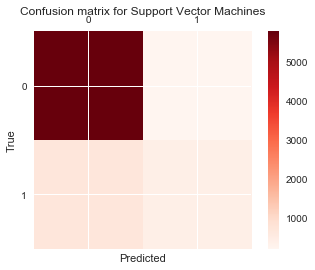

[[5671  325]
 [ 692  432]]


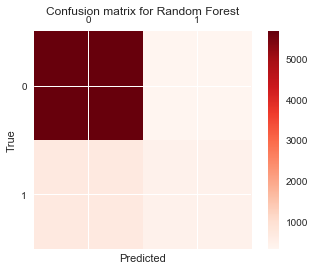

[[5492  504]
 [ 651  473]]


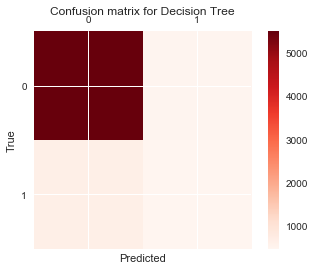

[[5762  234]
 [ 646  478]]


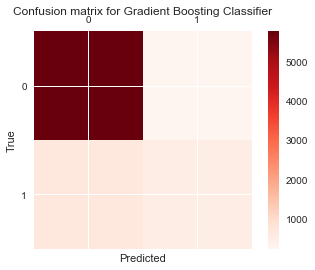

[[5785  211]
 [ 669  455]]


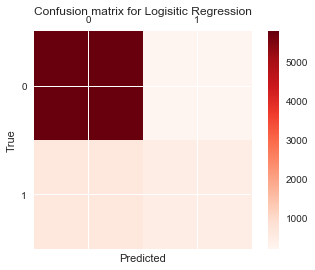

[[5763  233]
 [ 651  473]]


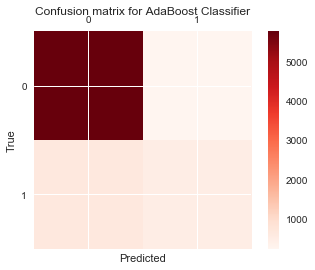

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(target)
class_names = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,run_cv(X,y,RF)) ),
    ( "Decision Tree", confusion_matrix(y,run_cv(X,y,DTC)) ),
    ( "Gradient Boosting Classifier", confusion_matrix(y,run_cv(X,y,GBC)) ),
    ( "Logisitic Regression", confusion_matrix(y,run_cv(X,y,LR)) ),
    ( "AdaBoost Classifier", confusion_matrix(y,run_cv(X,y,ABC)))
]


%matplotlib inline

draw_confusion_matrices(confusion_matrices,class_names)

### From this point onwards, we run 3 models to decide which features we can utilize so we could push more donation.

###  First we run Random Forest Model

### Before running the model, we use grid search to preprare parameters for Random Forest

### 2.5 Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV
grid_1 = { "n_estimators"      : [100,200,500],
               "criterion"         : ["gini", "entropy"],
               "max_features"      : ['sqrt','log2',0.2,0.5,0.8],
               "max_depth"         : [3,4,6,10],
               "min_samples_split" : [2, 5, 20,50] }
RF = RF()
grid_search = GridSearchCV(RF, grid_1, n_jobs=-1, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500], 'max_features': ['sqrt', 'log2', 0.2, 0.5, 0.8], 'min_samples_split': [2, 5, 20, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
grid_search.grid_scores_

/Users/yuhaowang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86980, std: 0.01131, params: {'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100},
 mean: 0.87107, std: 0.01267, params: {'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200},
 mean: 0.87191, std: 0.01308, params: {'max_features': 'sqrt', 'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 500},
 mean: 0.87121, std: 0.01255, params: {'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100},
 mean: 0.87079, std: 0.01239, params: {'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200},
 mean: 0.87135, std: 0.01254, params: {'max_features': 'sqrt', 'min_samples_split': 5, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 500},
 mean: 0.87093, std: 0.01257, params: {'max_features': 'sqrt', 'min_samples_split': 20, 'criterion': 'gini', 'max_depth': 3,

In [34]:
grid_search.best_score_

0.87191011235955052

####  These parameters will be used in the Random Forest Classifier

In [35]:
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 500}

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',max_depth=3,max_features='sqrt',min_samples_split=2,n_estimators=500) 

In [37]:
X = df_with_dummies.drop(['Gave2009'], axis=1).apply(pd.to_numeric)
y = df_with_dummies['Gave2009']
X = X.as_matrix().astype(np.float)
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 2.6 Draw ROC Curve  to the percisoion rate of Random Forest

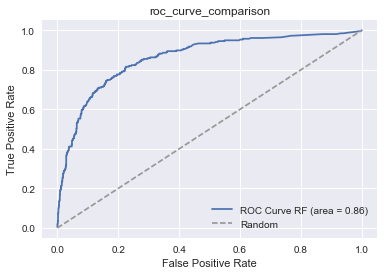

In [38]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
train_index,test_index = train_test_split(df_with_dummies.index)
rf = rf.fit(X[train_index], y[train_index])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y[test_index], rf.predict_proba(X[test_index])[:, 1])
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF (area = %0.2f)" % auc(fpr_rf, tpr_rf))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("roc_curve_comparison");

plt.legend(loc=4)

####  2.6.1 Feature Ranking

Feature ranking:
1. RYCohort (0.236427)
2. SpouseAlum (0.180779)
3. Gave2004 (0.112948)
4. Gave1999 (0.030423)
5. ActionNote (0.028794)
6. SportsAlum (0.003868)
7. UGAlumAwards (0.003607)
8. OtherUGAct (0.000485)
9. EverAssigned (0.000270)
10. BoardMember (0.000169)


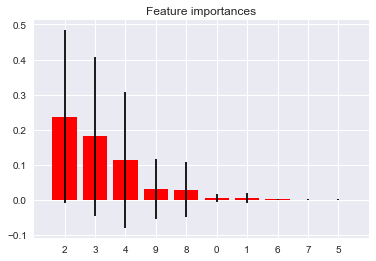

In [39]:
train_index,test_index = train_test_split(df_with_dummies.index)

forest = rf
forest_fit = forest.fit(X[train_index], y[train_index])
forest_predictions = forest_fit.predict(X[test_index])

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

features = df_with_dummies.drop(['Gave2009'], axis=1).columns

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

## Second Model, we run Gradient Boosting Classifier

### 2.7 Gradient Boosting

#### 2.7.1  We split the data for validation

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split , StratifiedKFold
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)

#### 2.7.2  Find the optimal number of features

In [42]:
rfecv_gbm = RFECV(estimator=gbmMod, step=1, cv=5,scoring='accuracy')
rfecv_gbm.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv_gbm.n_features_)

Optimal number of features : 13


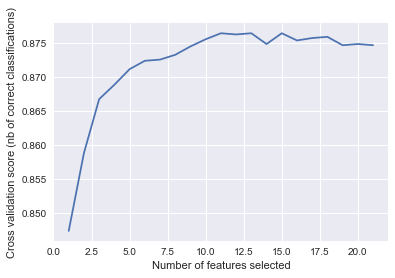

In [43]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_gbm.grid_scores_) + 1), rfecv_gbm.grid_scores_)
plt.show()

#### 2.7.3 Feature Ranking

In [48]:
importances = clf.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

features = df_with_dummies.drop(['Gave2009'], axis=1).columns

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

Feature ranking:
1. RYCohort (0.190272)
2. SpouseAlum (0.090551)
3. Gave2004 (0.081159)
4. Gave1999 (0.037038)
5. ActionNote (0.029391)
6. SportsAlum (0.022911)
7. UGAlumAwards (0.021875)
8. OtherUGAct (0.020373)
9. EverAssigned (0.016603)
10. BoardMember (0.006010)


#### 2.7.4  Feature Ranking in a chart

In [46]:
featureNames = []
for f in range(10):
    featureNames.append(   ( features[f]))
featureNames.reverse()

MSE: 0.0919


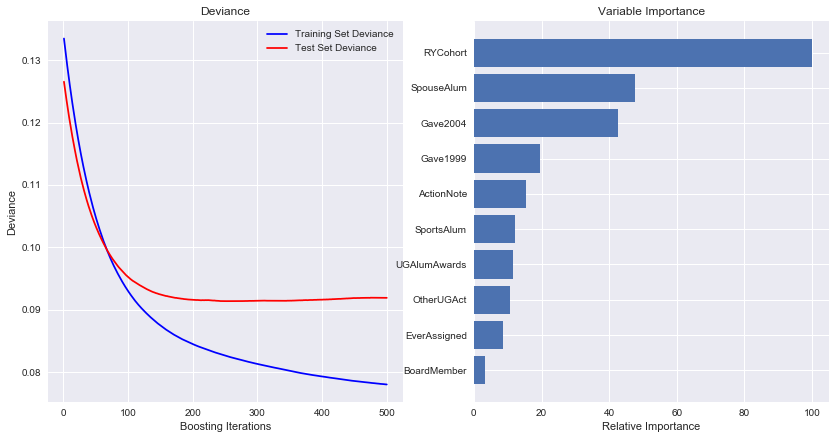

In [47]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)
    

# Plot training deviance
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


# Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance[0:10])


pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, featureNames)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


## Third Model, we run Logistic L1 and L2.

### 2.8 Logistic Regression

In [49]:
def print_grid_search_metrics(gs):
    print "Best score: %0.3f" % gs.best_score_
    print "Best parameters set:"
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5, verbose=1, refit=False)
Grid_LR.fit(X, y)

/Users/yuhaowang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=False, scoring=None, verbose=1)

#### 2.8.1  Find the best Parameter C for the following models

In [51]:
print_grid_search_metrics(Grid_LR)

Best score: 0.872
Best parameters set:
	C: 1
	penalty: 'l1'


#### 2.8.2 Run l1 

In [52]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(LogisticRegression(C=1,penalty='l1'), X, y, cv=5)
print "Logistic Regression 5-fold cross validation accuracy: " + str(np.mean(score))

Logistic Regression 5-fold cross validation accuracy: 0.872329165235


In [53]:
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print "Logistic Regression (L1) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      df_with_dummies.drop(['Gave2009'], axis=1).columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L1) Coefficients
Gave2004: 0.5589
Gave1999: 0.4006
ActionNote: 0.2394
Attended09: 0.2012
OnePlusEvents: 0.18
NetEvents: 0.1678
TotalReunions: 0.1245
SpouseAlum: 0.1185
SportsAlum: -0.08
TotalActions: 0.0707
ChildAlum: 0.0638
Attended04: 0.0575
SiblingAlum: 0.0575
UGAlumAwards: 0.0381
EverAssigned: 0.0296
OtherUGAct: 0.0155
RYCohort: 0.0116
Attended99: 0.0108
ParentAlum: 0.0089
BoardMember: -0.0036
GradDegree: -0.0026


#### 2.8.3 Run l2

In [54]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(LogisticRegression(C=1,penalty='l2'), X, y, cv=5)
print "Logistic Regression 5-fold cross validation accuracy: " + str(np.mean(score))

Logistic Regression 5-fold cross validation accuracy: 0.872048364919


In [55]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print "Logistic Regression (L2) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      df_with_dummies.drop(['Gave2009'], axis=1).columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L2) Coefficients
Gave2004: 0.5583
Gave1999: 0.4003
ActionNote: 0.2394
Attended09: 0.2016
OnePlusEvents: 0.1799
NetEvents: 0.1687
TotalReunions: 0.124
SpouseAlum: 0.1193
SportsAlum: -0.0816
TotalActions: 0.0724
ChildAlum: 0.0642
Attended04: 0.0583
SiblingAlum: 0.0583
UGAlumAwards: 0.0391
EverAssigned: 0.0298
OtherUGAct: 0.0168
RYCohort: 0.0136
Attended99: 0.0113
ParentAlum: 0.0098
BoardMember: -0.006
GradDegree: -0.0043


# Deep learning

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 25, epochs = 300)


Using TensorFlow backend.


Epoch 1/300
5696/5696 [==============================] - 0s - loss: 0.5383 - acc: 0.8469      
Epoch 2/300
5696/5696 [==============================] - 0s - loss: 0.3230 - acc: 0.8720     